<a href="https://colab.research.google.com/github/itstimetowin88/Final-Project-BUMK-744-/blob/main/BUMK744_Team_Assignment_2_Spring_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Assignment 2: Marketing Analytics**
*BUMK744 Marketing Research and Analytics*

Team: [TEAM NUMBER]

Team members, sorted in alphabetical order by last name:
* [LAST NAME, FIRST NAME]
* [LAST NAME, FIRST NAME]
* [LAST NAME, FIRST NAME]
* [LAST NAME, FIRST NAME]
* [LAST NAME, FIRST NAME]

By submitting this assignment, you are acknowledging the following pledge:

"I pledge on my honor that I have not given or received any unauthorized assistance on this exam/assignment."

**[Note: Everything between square brackets, and including the square brackets, in this template should be replaced or removed before you submit this assignment – including this note.]**

---


## Introduction

[The introduction serves two purposes:

a) Concisely describe your data set at a high level. Examples of things that could be included: The source of your data and a general description of your data in terms of variables and observations. Only include descriptive statistics that are relevant. Also, if you have a large dataset, you do not have to discuss all the variables you are analyzing. Being concise is key here.

b) Concisely describe the insights you want to derive from your dataset using the methods assigned to your team. What is the purpose of your analysis? How can your findings potentially help improve managerial decision making?

This section should contain text and optionally code (if you include descriptive statistics).
]

---

## Analysis

[As a team you should decide what to include in this section and how to present your findings. It should at least include:
* The insights that you are trying to find
* The relevant results from your statistical technique
* Your interpretation and how that connects back to your insights

It is important that you are concise, this means:
- Your interpretation of the results should be to the point
- Only include code cells and output that is relevant for your analysis

This section should contain text (your interpretations) and code (your analysis).
]

## Conclusion

[Provide a brief summary of your findings and explain how these findings can be used to improve managerial decision making. In addition, discuss if there are any limitations to your analysis and avenues that can be explored for further research.

This section should only contain text, no code.
]

## Team cooperation

[Describe how your team approached this assignment, how the work was distributed, and (if any) the difficulties encountered during the assignment and how you resolved these.

This section should only contain text, no code.
]

In [17]:
from sklearn import datasets

In [18]:
# Load the dataset into the iris variable
iris = datasets.load_iris()

# From the dataset, extract X, y, and variable labels
X = iris.data
y = iris.target
variable_labels = iris.feature_names

# Create a dataframe for X
X = pd.DataFrame(X, columns=variable_labels)

In [20]:
X.mean().round(2)

,0
sepal length (cm),5.84
sepal width (cm),3.06
petal length (cm),3.76
petal width (cm),1.20


In [19]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
X.var().round(2)

,0
sepal length (cm),0.69
sepal width (cm),0.19
petal length (cm),3.12
petal width (cm),0.58


In [22]:
X.cov().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.69,-0.04,1.27,0.52
sepal width (cm),-0.04,0.19,-0.33,-0.12
petal length (cm),1.27,-0.33,3.12,1.30
petal width (cm),0.52,-0.12,1.30,0.58


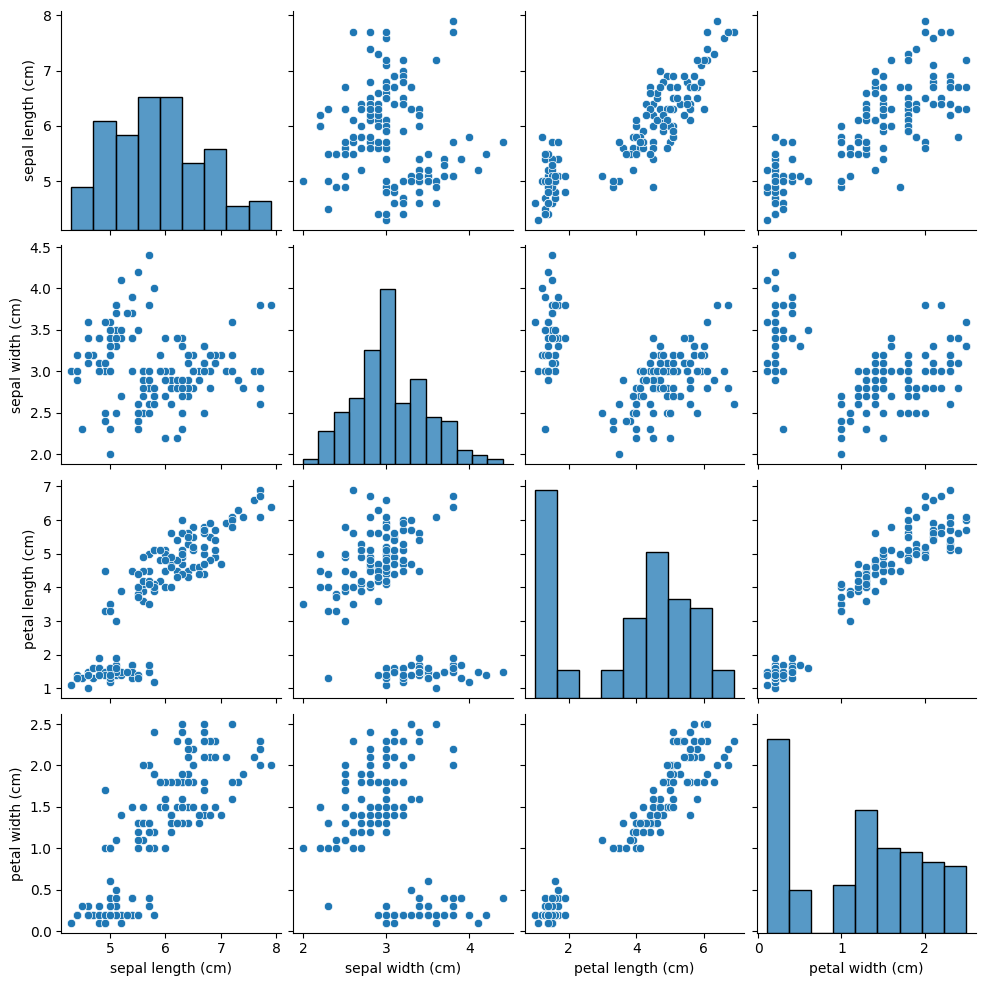

In [23]:
g = sns.pairplot(data=X)

In [24]:
X_only_length = X.loc[:, ['sepal length (cm)', 'petal length (cm)']]
X_only_length

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [9]:
# Re-import necessary packages after code execution state reset
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Reload Excel file
url = "https://raw.githubusercontent.com/itstimetowin88/Final-Project-BUMK-744-/refs/heads/main/submission.xlsx%20-%20sheet1.csv"
df = pd.read_csv(url)
df.head()


,location,condition,Listed_date,Listed_time,drive,fuel,lat,long,odometer,paint color,...,size,title status,transmission,type,year make model,cylinders,year,make,re_model,MODELS
0,dallas,excellent,6/1/2022,18;17,4wd,gas,32.856174,-96.672722,200396.0,NaN,...,NaN,clean,automatic,SUV,2010 Nissan Xterra,6,2010,Nissan,Nissan Xterra,Xterra
1,dallas,excellent,6/1/2022,18;16,fwd,hybrid,32.856174,-96.672722,152434.0,NaN,...,NaN,clean,automatic,SUV,2007 Lexus RX 400h,6,2007,Lexus,Lexus RX 400h,RX 400h
2,dallas,excellent,6/1/2022,18;16,fwd,gas,32.778500,-97.083400,90000.0,blue,...,mid-size,clean,automatic,sedan,2015 hyundai elantra,4,2015,hyundai,hyundai elantra,elantra
3,dallas,NaN,6/1/2022,18;16,fwd,gas,33.681077,-112.058490,61482.0,NaN,...,NaN,clean,automatic,van,2007 Honda Odyssey EX Power Side-Ent,6,2007,Honda,Honda Odyssey EX Power Side-Ent,Odyssey EX Power Side-Ent
4,dallas,excellent,6/1/2022,18;16,rwd,gas,32.856174,-96.672722,70523.0,NaN,...,mid-size,clean,automatic,sedan,2005 Infiniti G35 Sedan,6,2005,Infiniti,Infiniti G35 Sedan,G35 Sedan


In [15]:
# Clean and select numeric columns
numeric_cols = ['odometer', 'year', 'lat', 'long', 'cylinders']
df_clean = df[numeric_cols].copy()
df_clean['cylinders'] = pd.to_numeric(df_clean['cylinders'], errors='coerce')
df_clean = df_clean.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Use first two principal components for clustering
X_pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca_df)

# Add cluster labels
X_pca_df["Cluster"] = clusters



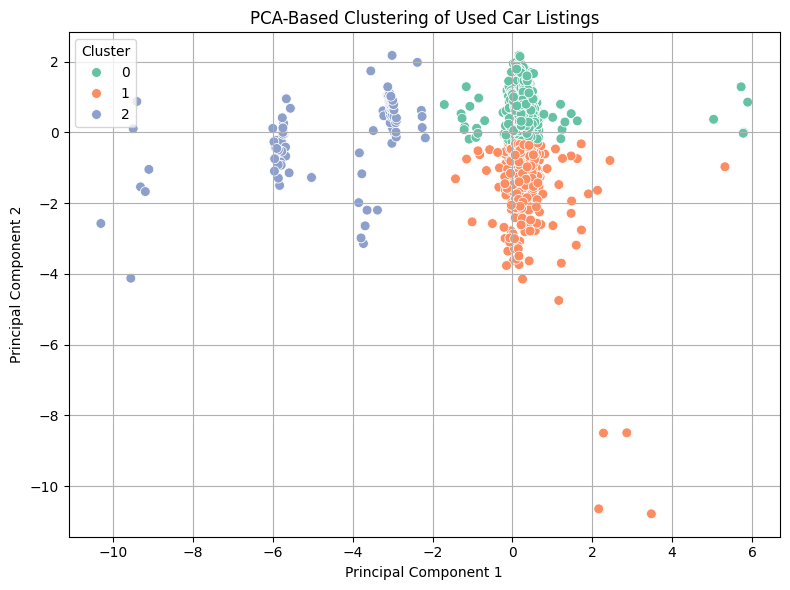

In [16]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=50)
plt.title("PCA-Based Clustering of Used Car Listings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()
